#Name: linqianshen
#Class: ALY6015
#Term: winter A 2020
#Last Update: 1/12/2020

In [0]:
import numpy as np
import pandas as pd
import os
from statistics import mean
import seaborn as sns
import matplotlib as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:

url = "https://docs.google.com/spreadsheets/d/1PswB83fByccE7oL9iS3XnfwwDQo4AL-qW9ljBL_2ZQ4/gviz/tq?tqx=out:csv"
df = pd.read_csv(url)

print(df.head())

   Store        Date  Temperature  ...         CPI  Unemployment  IsHoliday
0      1  2010-02-05        42.31  ...  211.096358         8.106      False
1      1  2010-02-12        38.51  ...  211.242170         8.106       True
2      1  2010-02-19        39.93  ...  211.289143         8.106      False
3      1  2010-02-26        46.63  ...  211.319643         8.106      False
4      1  2010-03-05        46.50  ...  211.350143         8.106      False

[5 rows x 12 columns]


In [0]:
df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [0]:
#feature engineering
df['CPI'] = df['CPI'].fillna(mean(df['CPI']))
df['Unemployment'] = df['Unemployment'].fillna(mean(df['Unemployment']))
df['MarkDown1'] = df['MarkDown1'].fillna(0)
df['MarkDown2'] = df['MarkDown2'].fillna(0)
df['MarkDown3'] = df['MarkDown3'].fillna(0)
df['MarkDown4'] = df['MarkDown4'].fillna(0)
df['MarkDown5'] = df['MarkDown5'].fillna(0)

In [0]:

store_url = "https://docs.google.com/spreadsheets/d/1ONV5_6zUelzbecf9vHeU4RqoH6FtkLEcAdrQG8w0FCc/gviz/tq?tqx=out:csv"
stores = pd.read_csv(store_url)

print(stores.head())

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [0]:
train_url = "https://docs.google.com/spreadsheets/d/1adAKnYD4dGOmkhHnX5G_mJZtrXE4Y2qjkSmGlKjyPOc/gviz/tq?tqx=out:csv"
trains = pd.read_csv(train_url)
print(trains.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [0]:
#merge all features with training data and stores data
new_data = pd.merge(df, trains, on=['Store','Date','IsHoliday'], how='inner')
data = pd.merge(new_data,stores,how='inner',on=['Store'])
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
1,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,2,50605.27,A,151315
2,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,3,13740.12,A,151315
3,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,4,39954.04,A,151315
4,1,2010-02-05,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,5,32229.38,A,151315


Analysis
1.type A has the largest size of stores and Type C has the smallest sizee of stores 

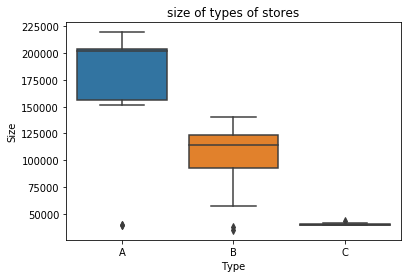

In [0]:
#boxplot for sizes of types of stores
store_type = pd.concat([stores['Type'], stores['Size']], axis=1)
fig = sns.boxplot(x='Type', y='Size', data=store_type).set_title("size of types of stores")

Analysis 2 
Type C hit the total largest weekly sales by average and by maximum, though it has the smallest size of stores.

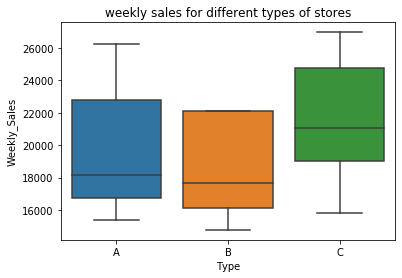

In [0]:
#boxplot for weekly sales for different types of stores
store_sale = pd.concat([stores['Type'], trains['Weekly_Sales']], axis=1)
fig = sns.boxplot(x='Type', y='Weekly_Sales', data=store_sale, showfliers=False).set_title("weekly sales for different types of stores")

Analysis 3
We see that the holiday sales is about 7.5% of the non-holiday sales.

In [0]:
# total count of sales on holidays and non holidays
print('sales-non-holiday : ',trains[trains['IsHoliday']==False]['Weekly_Sales'].count().round(1))
print('sales-holiday : ',trains[trains['IsHoliday']==True]['Weekly_Sales'].count().round(1))

sales-non-holiday :  391909
sales-holiday :  29661


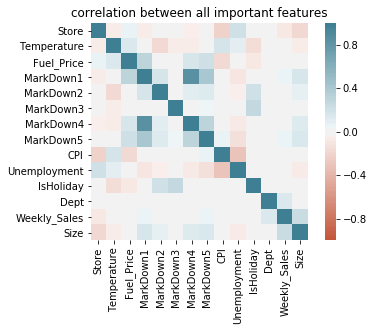

In [0]:
# Plotting correlation between all important features
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
).set_title("correlation between all important features")

Analysis 4
When there is high inflation(CPI is large), it did not affect the weekly sales

Text(0.5, 0.98, 'weekly sales correlation with CPI')

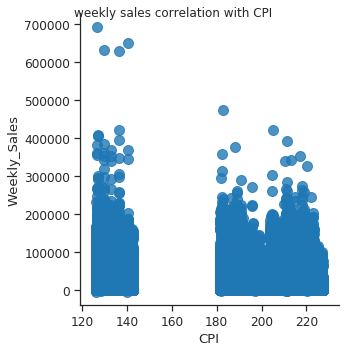

In [0]:

x = data['CPI']
y = data['Weekly_Sales']
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
lm=sns.lmplot('CPI', # Horizontal axis
           'Weekly_Sales', # Vertical axis
           data=data, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 100})
fig = lm.fig 
fig.suptitle('weekly sales correlation with CPI', fontsize=12)


Conclusion:
The walmart 45 stores data shows that type C has the most weekly sales and should add more such type store.
The holiday season is 6% time of the whole year but has 7.5% sales volume of the non-holiday season. It is though that in recent years, the number of sales in holiday season increases.
Considering the inflation, it does not affect the sales.